In [1]:
# import dependencies 
from fastai.vision.all import *
import timm
from torchvision import transforms
from pathlib import Path
from utils import get_y, create_dls, get_mean_table, dataset_forecast, adapt_model_to_new_dls, create_dls_stratified

e:\Users\Dalton\anaconda3\envs\plant_inspector\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
dataset = 'PlantDoc'
model_architecture = 'efficientvit_b0'
epochs = 15

In [22]:
dls = create_dls_stratified(train_pct=0.8, path=f'data/{dataset}/')
model = timm.create_model(model_architecture, pretrained=True, num_classes=dls.c)
learn = Learner(dls, model, metrics=accuracy)
learn.fine_tune(epochs=1)

e:\Users\Dalton\anaconda3\envs\plant_inspector\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
model.safetensors: 100%|██████████| 13.7M/13.7M [00:03<00:00, 3.49MB/s]
e:\Users\Dalton\anaconda3\envs\plant_inspector\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dalton\.cache\huggingface\hub\models--timm--efficientvit_b0.r224_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Pytho

epoch,train_loss,valid_loss,accuracy,time
0,2.324637,3.458767,0.046967,04:20


epoch,train_loss,valid_loss,accuracy,time
0,1.284734,2.555171,0.285714,3:09:44


In [10]:
learn.save(f'{model_architecture}/{dataset}_{epochs}_epochs')

Path('models/efficientnet_b0/FieldPlant_75_epochs.pth')

In [16]:
learn3 = learn.load(f'{model_architecture}/{dataset}_{epochs}_epochs')

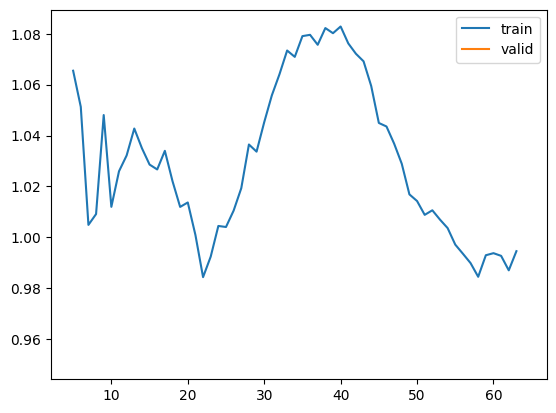

In [17]:
learn3.recorder.plot_loss()

In [ ]:
learn2 = adapt_model_to_new_dls(learn, dls)

In [ ]:
def iteratively_train_on_dataset_fractions(train_pcts = [0.1, 0.25, 0.5, 0.65], replicates=1, dataset_path):
    results_table = pd.DataFrame(columns=['train_pct', 'acc'])
    for train_pct in train_pcts:
        print(f'Creating DL: {train_pct}')
        dls = create_dls(train_pct, dataset_path)
        for replicate in range(replicates): # repeat training and average results for increased accuracy 
            print(f'{train_pct} replicate {replicate}')
            # fine tune model
            model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=dls.c)
            learn = Learner(dls, model, metrics=accuracy)
            learn.fine_tune(epochs=15)
            val_acc = learn.recorder.values[-1][2]
            row = pd.DataFrame({'train_pct': train_pct, 'acc': val_acc}, index=[0])
            results_table = pd.concat([results_table, row])
    mean_table = get_mean_table(results_table)
    return mean_table

In [ ]:
train_pcts = [0.1, 0.25, 0.5, 0.65]
replicates = 3
results_table = pd.DataFrame(columns=['train_pct', 'acc'])
for train_pct in train_pcts:
    print(f'Creating DL: {train_pct}')
    dls = create_dls(train_pct)
    for replicate in range(replicates): # repeat training and average results for increased accuracy 
        print(f'{train_pct} replicate {replicate}')
        # fine tune model
        model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=dls.c)
        learn = Learner(dls, model, metrics=accuracy)
        learn.fine_tune(epochs=15)
        val_acc = learn.recorder.values[-1][2]
        row = pd.DataFrame({'train_pct': train_pct, 'acc': val_acc}, index=[0])
        results_table = pd.concat([results_table, row])

mean_table = get_mean_table(results_table)

In [ ]:
polynomial = dataset_forecast(mean_table)

In [ ]:
percentage_of_data = 0.9
predicted_accuracy = polynomial(percentage_of_data)
predicted_accuracy

In [ ]:
train_pcts = [0.9]
replicates = 3
results_table = pd.DataFrame(columns=['train_pct', 'acc'])
for train_pct in train_pcts:
    print(f'Creating DL: {train_pct}')
    dls = create_dls(train_pct)
    for replicate in range(replicates): # repeat training and average results for increased accuracy 
        print(f'{train_pct} replicate {replicate}')
        # fine tune model
        model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=dls.c)
        learn = Learner(dls, model, metrics=accuracy)
        learn.fine_tune(epochs=15)
        val_acc = learn.recorder.values[-1][2]
        row = pd.DataFrame({'train_pct': train_pct, 'acc': val_acc}, index=[0])
        results_table = pd.concat([results_table, row])

mean_table = pd.concat([mean_table, get_mean_table(results_table)])
mean_table = mean_table.reset_index()

In [ ]:
# plot polynomial here
polynomial = dataset_forecast(mean_table)

In [ ]:
percentage_of_data = 0.95
predicted_accuracy = polynomial(percentage_of_data)
predicted_accuracy

In [ ]:
# Resnet-18
# epoch	train_loss	valid_loss	accuracy	time
# 0	2.329669	2.175517	0.398039	04:44
# 1	2.047739	1.710715	0.527451	04:47
# 2	1.696105	1.822478	0.431373	04:57
# 3	1.373082	1.125379	0.621569	05:14
# 4	1.118939	1.178962	0.613725	05:16
# 5	0.903016	1.063396	0.656863	05:16
# 6	0.726309	0.970530	0.662745	05:16
# 7	0.587566	0.937186	0.670588	05:15
# 8	0.492905	0.925825	0.688235	05:04
# 9	0.435941	0.922592	0.692157	04:56

In [ ]:
learn.save('fine_tuned_model')

In [ ]:
train_pcts = [0.1, 0.25, 0.5, 0.65]
replicates = 3
field_plant_results_table = pd.DataFrame(columns=['train_pct', 'acc'])
for train_pct in train_pcts:
    print(f'Creating DL: {train_pct}')
    dls = create_dls(train_pct, 'plantvillage-dataset/color')
    for replicate in range(replicates): # repeat training and average results for increased accuracy 
        print(f'{train_pct} replicate {replicate}')
        # fine tune model
        model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=dls.c)
        learn = Learner(dls, model, metrics=accuracy)
        learn.fine_tune(epochs=15)
        val_acc = learn.recorder.values[-1][2]
        row = pd.DataFrame({'train_pct': train_pct, 'acc': val_acc}, index=[0])
        field_plant_results_table = pd.concat([field_plant_results_table, row])

In [ ]:
# polynomial = dataset_forecast(field_plant_results_table)

In [ ]:
train_pcts = [0.1, 0.25, 0.5, 0.65]
replicates = 3
field_plant_results_table = pd.DataFrame(columns=['train_pct', 'acc'])
for train_pct in train_pcts:
    print(f'Creating DL: {train_pct}')
    dls = create_dls(train_pct, 'plantvillage-dataset/segmented')
    for replicate in range(replicates): # repeat training and average results for increased accuracy 
        print(f'{train_pct} replicate {replicate}')
        # fine tune model
        model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=dls.c)
        learn = Learner(dls, model, metrics=accuracy)
        learn.fine_tune(epochs=15)
        val_acc = learn.recorder.values[-1][2]
        row = pd.DataFrame({'train_pct': train_pct, 'acc': val_acc}, index=[0])
        field_plant_results_table = pd.concat([field_plant_results_table, row])

In [ ]:
dls = create_dls(0.8, 'plantvillage-dataset/segmented')
# for replicate in range(replicates): # repeat training and average results for increased accuracy 
# print(f'{train_pct} replicate {replicate}')
# # fine tune model
model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=dls.c)
learn = Learner(dls, model, metrics=accuracy)
learn.fine_tune(epochs=15)

In [ ]:
dls = create_dls(0.8, 'plantvillage-dataset/color')
model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=dls.c)
learn = Learner(dls, model, metrics=accuracy)
learn.fine_tune(epochs=1)
learn.recorder.plot_loss() 

In [ ]:
# Load the new dataset
dls = create_dls_stratified(0.5, 'FieldPlant-dataset')

In [ ]:
learn2 = adapt_model_to_new_dls(learn, dls)    
learn2.validate()


In [20]:
timm.list_models('*VIT*')


['convit_base',
 'convit_small',
 'convit_tiny',
 'crossvit_9_240',
 'crossvit_9_dagger_240',
 'crossvit_15_240',
 'crossvit_15_dagger_240',
 'crossvit_15_dagger_408',
 'crossvit_18_240',
 'crossvit_18_dagger_240',
 'crossvit_18_dagger_408',
 'crossvit_base_240',
 'crossvit_small_240',
 'crossvit_tiny_240',
 'davit_base',
 'davit_giant',
 'davit_huge',
 'davit_large',
 'davit_small',
 'davit_tiny',
 'efficientvit_b0',
 'efficientvit_b1',
 'efficientvit_b2',
 'efficientvit_b3',
 'efficientvit_l1',
 'efficientvit_l2',
 'efficientvit_l3',
 'efficientvit_m0',
 'efficientvit_m1',
 'efficientvit_m2',
 'efficientvit_m3',
 'efficientvit_m4',
 'efficientvit_m5',
 'fastvit_ma36',
 'fastvit_s12',
 'fastvit_sa12',
 'fastvit_sa24',
 'fastvit_sa36',
 'fastvit_t8',
 'fastvit_t12',
 'flexivit_base',
 'flexivit_large',
 'flexivit_small',
 'gcvit_base',
 'gcvit_small',
 'gcvit_tiny',
 'gcvit_xtiny',
 'gcvit_xxtiny',
 'levit_128',
 'levit_128s',
 'levit_192',
 'levit_256',
 'levit_256d',
 'levit_384',
 '

In [25]:
# List all available models in timm and check if 'seresnextnet50' or similar exists
model_names = timm.list_models()
similar_models = [model for model in model_names if "seresnext" in model]

similar_models

['legacy_seresnext26_32x4d',
 'legacy_seresnext50_32x4d',
 'legacy_seresnext101_32x4d',
 'seresnext26d_32x4d',
 'seresnext26t_32x4d',
 'seresnext26ts',
 'seresnext50_32x4d',
 'seresnext101_32x4d',
 'seresnext101_32x8d',
 'seresnext101_64x4d',
 'seresnext101d_32x8d',
 'seresnextaa101d_32x8d',
 'seresnextaa201d_32x8d']

In [26]:
model = timm.create_model('seresnext50_32x4d', pretrained=False)

# Counting the number of parameters
total_params = sum(p.numel() for p in model.parameters())

print(f"Total number of parameters in the model: {total_params}")

Total number of parameters in the model: 27559896


In [27]:
model = timm.create_model('resnet50', pretrained=False)

# Counting the number of parameters
total_params = sum(p.numel() for p in model.parameters())

print(f"Total number of parameters in the model: {total_params}")

Total number of parameters in the model: 25557032
